# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [46]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [47]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/ML CLASS/P1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Observations:
COMMENT: The dataframe contains information on individual orders including the customer id, restaurant name, cuisine type, order cost, day of the week, rating, preparation time, and delivery time.


The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [50]:
# Write your code here
row_count, column_count = df.shape
print(f"There are {row_count} rows and {column_count} columns present in the data.")

There are 1898 rows and 9 columns present in the data.


#### Observations:
COMMENT: There are 1898 rows and 9 columns present in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [51]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
COMMENT: According to the code output, the datatypes of the different columns in the dataset include integers, objects, and floating decimal values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [52]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
COMMENT: There are no null/missing values in any of the columns of the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [53]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
COMMENT: The minimum, average, and maximum time it takes for food to be prepared once and order is placed is 20, 27.37, and 35 minutes respectively.

### **Question 5:** How many orders are not rated?

In [54]:
# Write the code here
#df['rating'].isnull().sum()
(df['rating'] == 'Not given').sum()

736

#### Observations:
COMMENT: There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

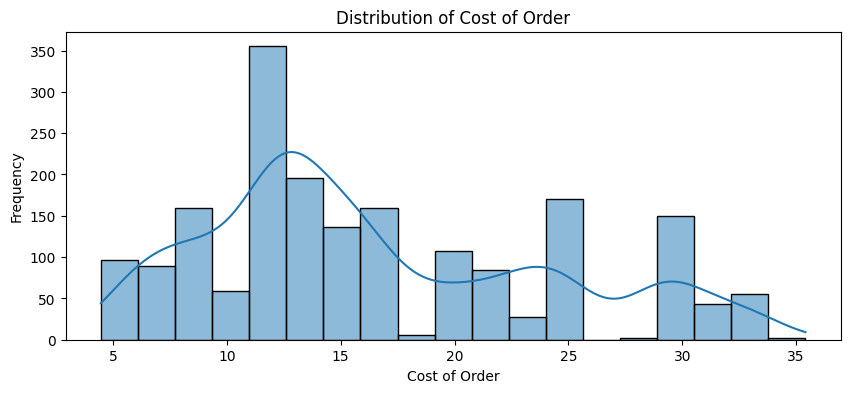

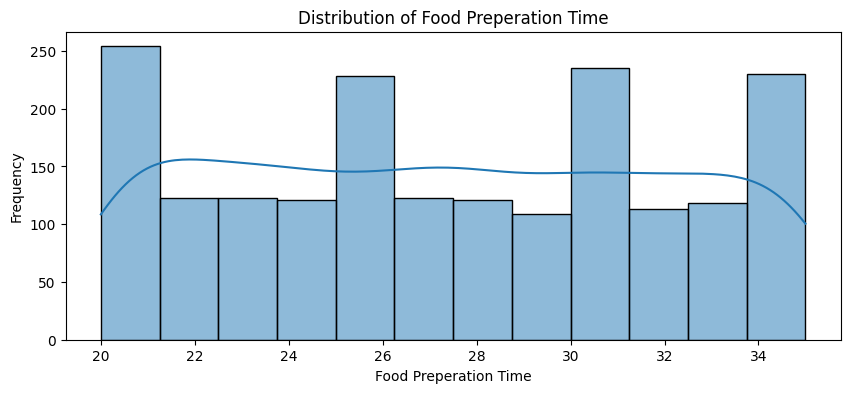

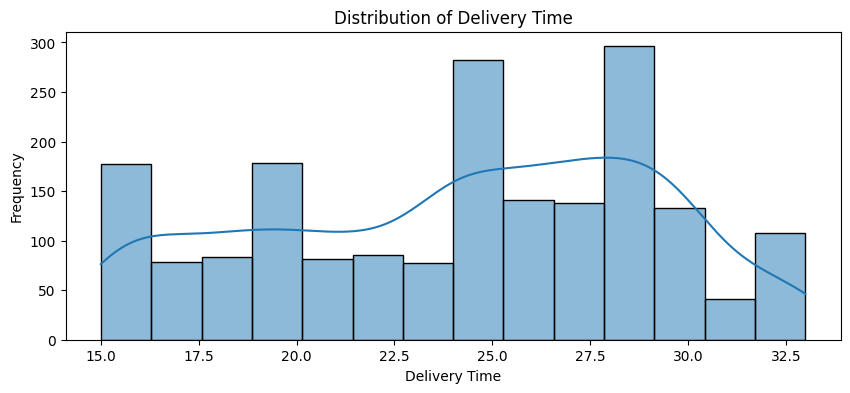

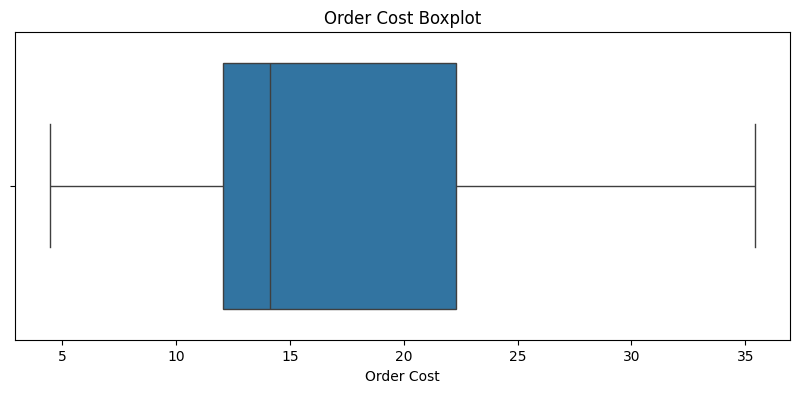

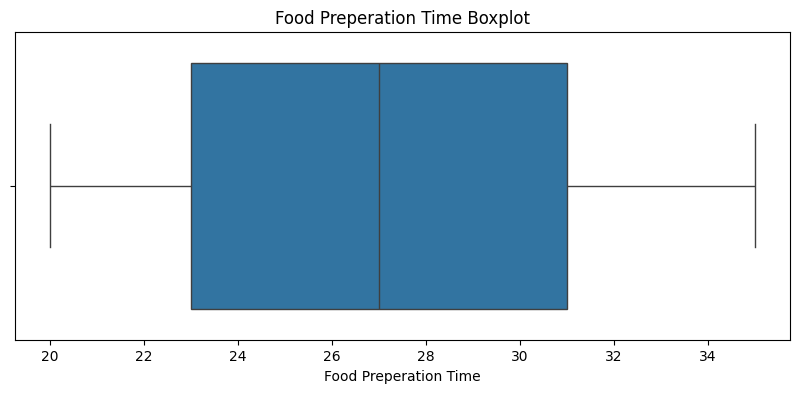

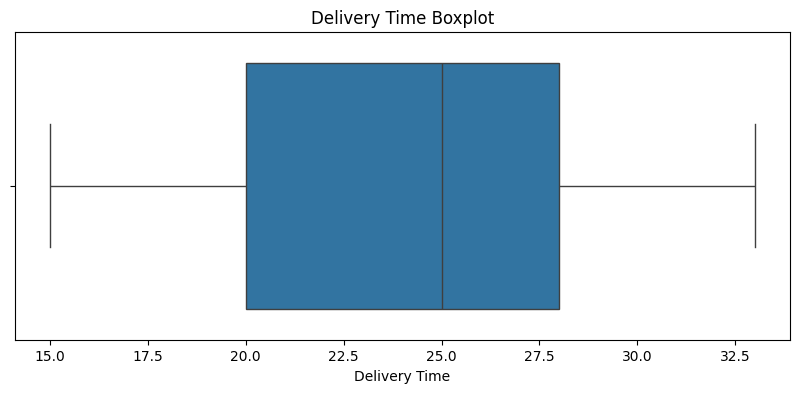

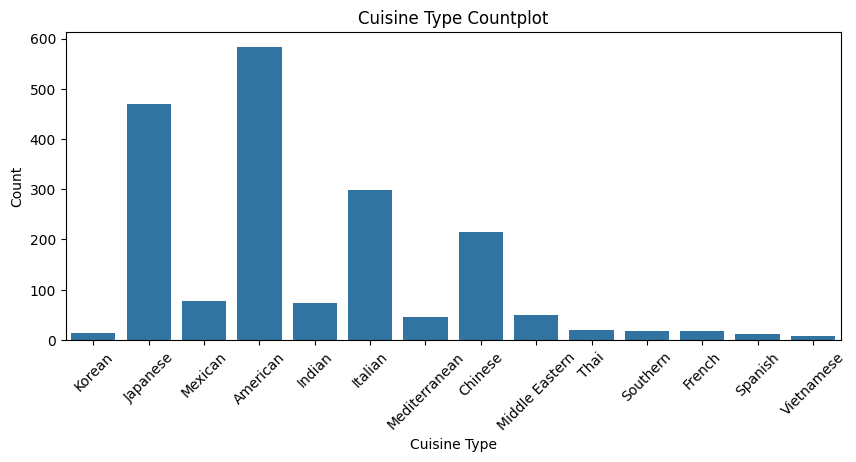

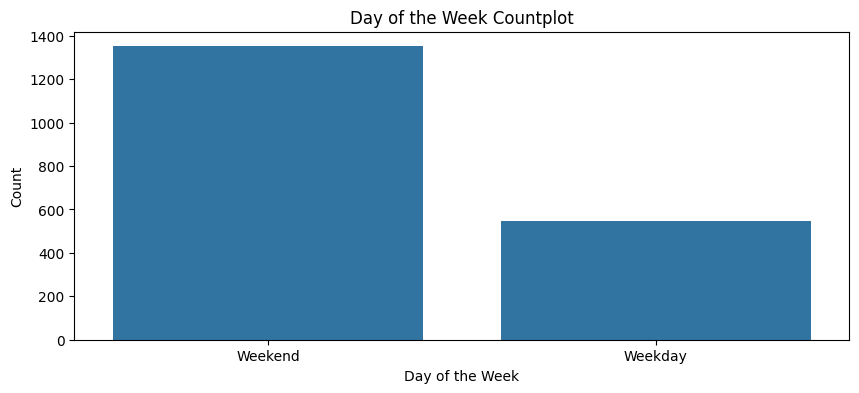

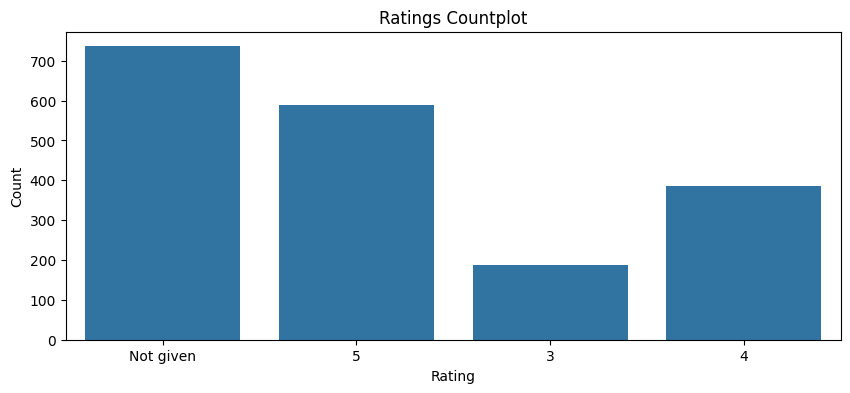

In [55]:
# Write the code here

#HISTOGRAMS
#Distribution of cost_of_order
plt.figure(figsize=(10,4))
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Cost of Order')
plt.xlabel('Cost of Order')
plt.ylabel('Frequency')
plt.show()

#Distribution of food_preperation_time
plt.figure(figsize=(10,4))
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preperation Time')
plt.xlabel('Food Preperation Time')
plt.ylabel('Frequency')
plt.show()

#Distribution of delivery_time
plt.figure(figsize=(10,4))
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

#BOXPLOTS
#Boxplot of cost_of_the_order
plt.figure(figsize=(10,4))
sns.boxplot(x = df['cost_of_the_order'])
plt.title('Order Cost Boxplot')
plt.xlabel('Order Cost')
plt.show()

#Boxplot of food_preperation_time
plt.figure(figsize=(10,4))
sns.boxplot(x = df['food_preparation_time'])
plt.title('Food Preperation Time Boxplot')
plt.xlabel('Food Preperation Time')
plt.show()

#Boxplot of delivery_time
plt.figure(figsize=(10,4))
sns.boxplot(x = df['delivery_time'])
plt.title('Delivery Time Boxplot')
plt.xlabel('Delivery Time')
plt.show()

#COUNTPLOTS
#Countplot of cost_of_the_order
plt.figure(figsize=(10,4))
sns.countplot(x = 'cuisine_type', data = df)
plt.title('Cuisine Type Countplot')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Countplot of day_of_the_week
plt.figure(figsize=(10,4))
sns.countplot(x = 'day_of_the_week', data = df)
plt.title('Day of the Week Countplot')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

#Countplot of rating
plt.figure(figsize=(10,4))
sns.countplot(x = 'rating', data = df)
plt.title('Ratings Countplot')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [56]:
# Write the code here
top_five_restaurants = df['restaurant_name'].value_counts().head()
print("Top 5 restaurants in terms of the number of orders recieved are:")
print(top_five_restaurants)

Top 5 restaurants in terms of the number of orders recieved are:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
COMMENT: There is noteable differences in the amount of orders these restaurants recieved and it appears that the sandwhich shops tend to recieve the most.

### **Question 8**: Which is the most popular cuisine on weekends?

In [57]:
# Write the code here
orders_on_weekends = df[df['day_of_the_week'] == 'Weekend']
popular_weekend_cuisine = orders_on_weekends['cuisine_type'].value_counts().idxmax()
print(f"The most popular cuisine on weekends is {popular_weekend_cuisine}")

The most popular cuisine on weekends is American


#### Observations:
COMMENT: Factors such as cost which could be the result of preparation and delivery times could be contributing factors of American cuisine's popularity.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [58]:
# Write the code here

# filter to orders that cost more than 20 dollars
orders_greater_20 = df[df['cost_of_the_order'] > 20]

# calc percentage of total
percentage_greater_20 = (len(orders_greater_20) / len(df)) * 100
print(f"The percentage of the orders that cost more than 20 dollars is {percentage_greater_20:.2f}%")

The percentage of the orders that cost more than 20 dollars is 29.24%


#### Observations:
COMMENT: Most orders cost under $30.

### **Question 10**: What is the mean order delivery time?

In [59]:
# Write the code here
mean_order_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time: {mean_order_delivery_time:.2f} min.")

The mean order delivery time: 24.16 min.


#### Observations:
COMMENT: It takes the driver on average under hald an hour to drive from the restaurants to the respective customers.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [60]:
# Write the code
num_orders_per_customer = df['customer_id'].value_counts()
top_3 = num_orders_per_customer.head(3)
print("The IDs and number of orders of the top 3 customers are: ")
print(top_3)

The IDs and number of orders of the top 3 customers are: 
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
COMMENT: The number of orders by each of these top 3 customers are comprabale so perhaps this may fluctuate over time.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Correlation Matrix of Dataframe:
                       order_id  customer_id  cost_of_the_order  \
order_id               1.000000    -0.013960           0.021171   
customer_id           -0.013960     1.000000          -0.001322   
cost_of_the_order      0.021171    -0.001322           1.000000   
food_preparation_time -0.007026    -0.030330           0.041527   
delivery_time          0.009690    -0.009885          -0.029949   

                       food_preparation_time  delivery_time  
order_id                           -0.007026       0.009690  
customer_id                        -0.030330      -0.009885  
cost_of_the_order                   0.041527      -0.029949  
food_preparation_time               1.000000       0.011094  
delivery_time                       0.011094       1.000000  


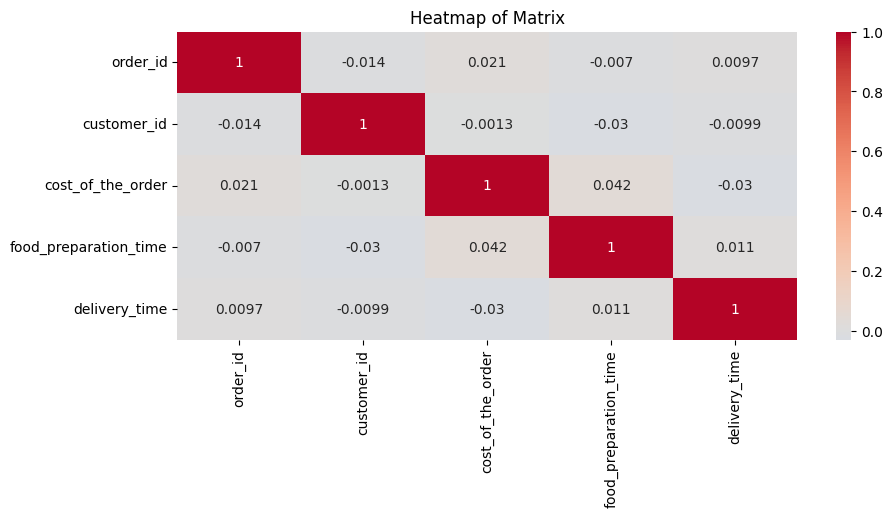

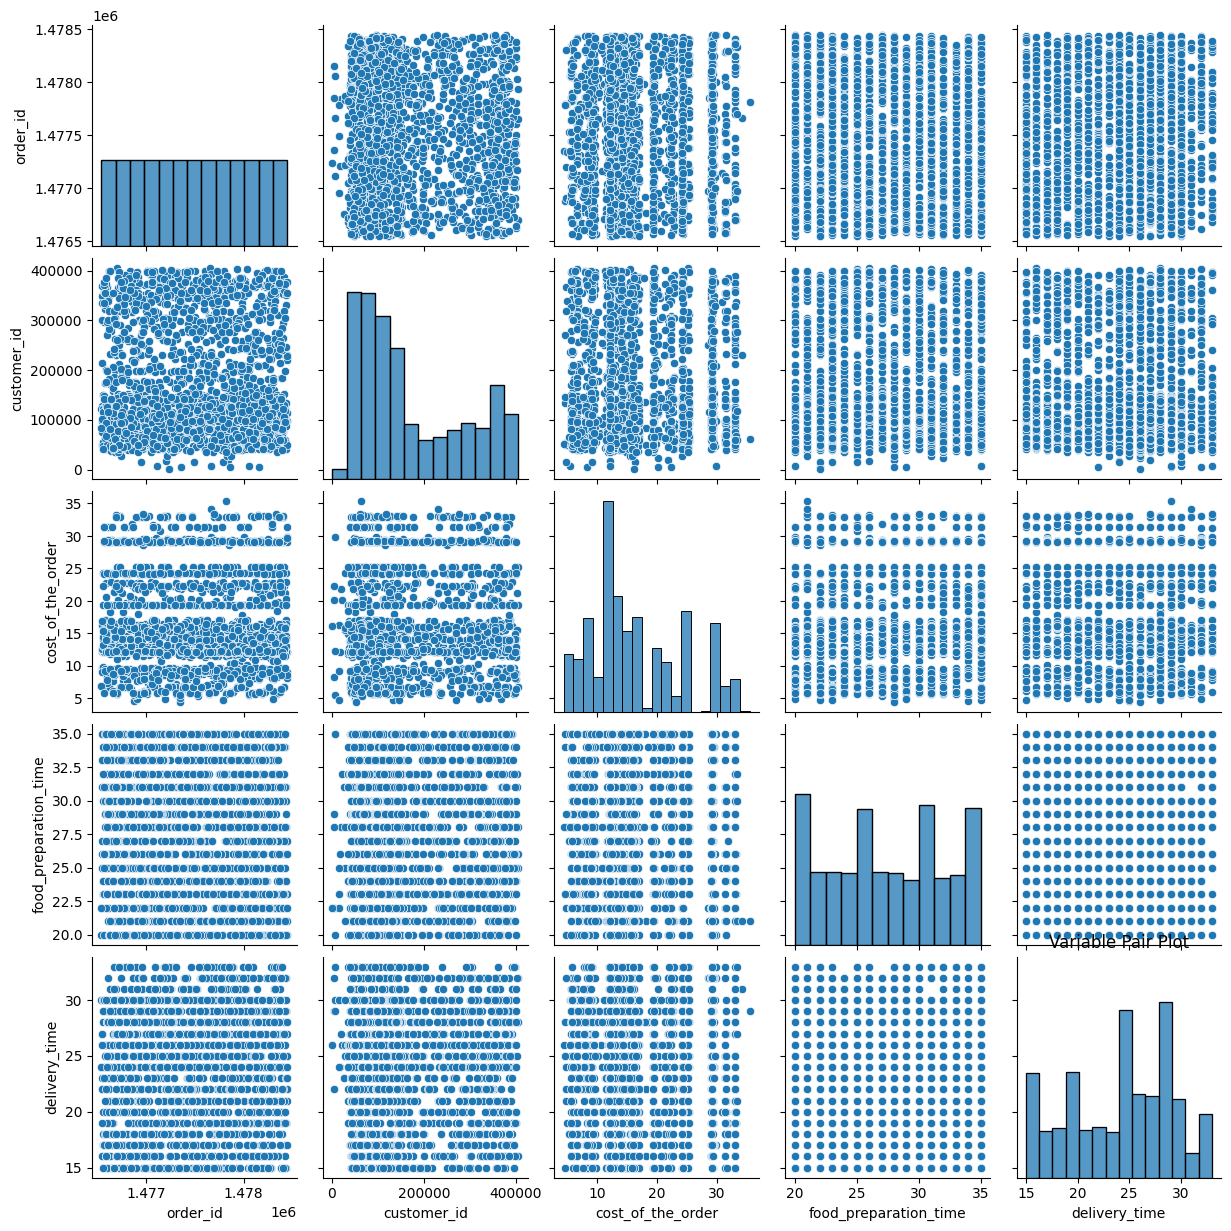

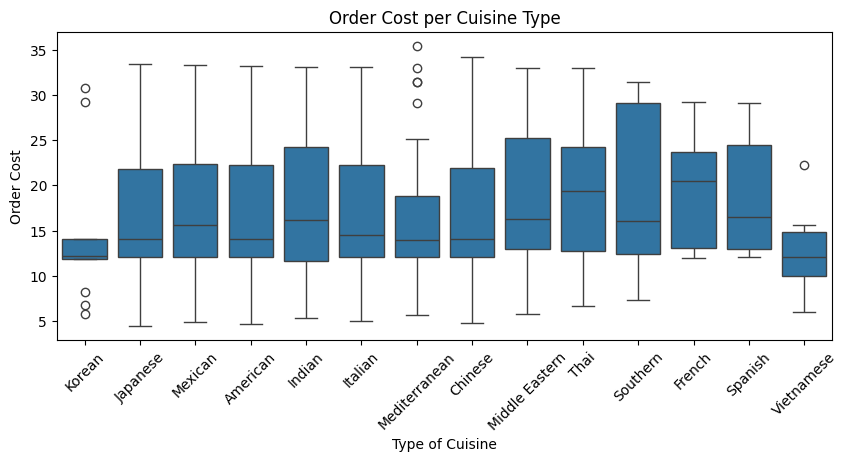

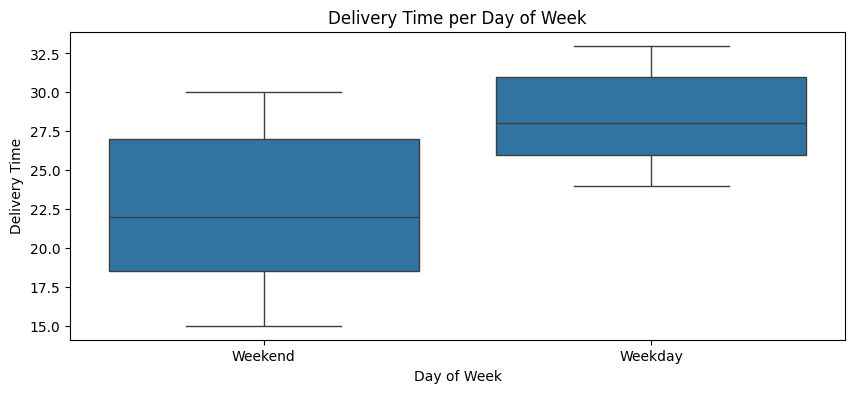

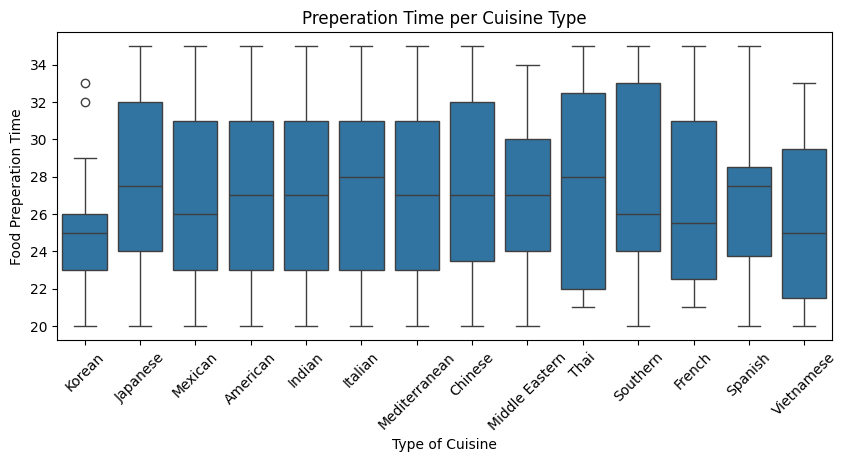

In [61]:
# Write the code here

#CORRELATION MATRIX
num_only_df = df.select_dtypes(include = ['float64', 'int64'])


corr_matrix = num_only_df.corr()
print('Correlation Matrix of Dataframe:')
print(corr_matrix)

#HEATMAP
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', center = 0)
plt.title('Heatmap of Matrix')
plt.show()

#PAIRPLOT
sns.pairplot(df)
plt.title('Variable Pair Plot')
plt.show()

#BOXPLOTS
#cost_of_the_order and cuisine_type relationship
plt.figure(figsize=(10,4))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df)
plt.title('Order Cost per Cuisine Type')
plt.xlabel('Type of Cuisine')
plt.ylabel('Order Cost')
plt.xticks(rotation=45)
plt.show()

#day_of_the_week and delivery_time relationship
plt.figure(figsize=(10,4))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.title('Delivery Time per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Delivery Time')
plt.show()

#cuisine_type and foos_preparation_time relationship
plt.figure(figsize=(10,4))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.title('Preperation Time per Cuisine Type')
plt.xlabel('Type of Cuisine')
plt.ylabel('Food Preperation Time')
plt.xticks(rotation=45)
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [62]:
# Write the code here

# convert values to numbers
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

# organize data to show the number of ratings and average rating per restaurant
rating_vals = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# make dataframe of the restaurant that have an average rating greater than 4 and more than 50 total ratings
restaurants_meeting_criteria = rating_vals[(rating_vals['mean'] > 4) & (rating_vals['count'] > 50)]
print('The reestaurants fulfilling the criteria to get the promotional offer are:')
print(restaurants_meeting_criteria)

The reestaurants fulfilling the criteria to get the promotional offer are:
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:
COMMENT: There are only four restaurants that are eligible and each have comprable rating statistics (count and mean) with the exception of Shake Shack having a much greater number of reviews at 133.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [63]:
# Write the code here

# function to calculate respective commissions
def calc_charge(order_cost):
    if order_cost > 20:
      return order_cost * 0.25
    elif order_cost > 5:
      return order_cost * 0.15
    else:
      return 0

df['co_charges'] = df['cost_of_the_order'].apply(calc_charge)
co_net_revenue = df['co_charges'].sum()

print(f'The net revenue generated by the company across all orders is: {co_net_revenue:.2f} dollars')


The net revenue generated by the company across all orders is: 6166.30 dollars


#### Observations:
COMMENT: The company only makes revenue on orders above 5 dollars and they make more per order on orders above 20 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [64]:
# Write the code here

# make new column for total time
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# filter to orders that take more than 60 minutes
orders_greater_60_min = df[df['total_time'] > 60]

# calculate percentage of total
percentage_orders_greater_60_min = (len(orders_greater_60_min) / len(df)) * 100
print(f'The perentage of orders that take more than 60 minutes to get delivered from the time the order is placed is: {percentage_orders_greater_60_min:.2f}%')

The perentage of orders that take more than 60 minutes to get delivered from the time the order is placed is: 10.54%


#### Observations:
COMMENT: A complete order transaction is usually completed in under an hour (roughly 9 out of 10 orders are).

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [65]:
# Write the code here
avg_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
print('Mean delivery times on weekdays and weekends:')
print(avg_delivery_times)

Mean delivery times on weekdays and weekends:
  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:
COMMENT: The mean/average delivery time is greater on weekdays relative to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  A considerable amount of the recorded orders cost more than 20 dollars which earns the company a greater revenue by the greater 25% commission.

* Weekends on average had shorter delivery times and about 90% of orders took under an hour to be prepared and delivered.

* From the avaiable ratings, the results ranged from 3 to 5. We can infer that customer's were overall fairly satisfied, but not entirely.

* The prices of the orders varys on factors such as the type of cuisine, which could be a contributing factor to the popularity of American foods.

### Recommendations:

* Incentivize customer ratings to get a greater volume of responses and analyze specific feedback on quality of food and service.

* Identify relative demand throughout the days of the week and hours of the day and allocate resources such as drivers and other staff to handle orders and reduce delivery time. In addition, analyze preparation techniques for cooks and route data for drivers to prepare and deliver quality food in the shortest namount of time.

* Incentivize more customer spending (above 20 dollars) to make more revenue by implementing more desireable and popular cuisines such as American foods, family meals, or catering. Advertise to attract additional potential customers.

* Furthermore, diversify cuisine offerings to attract different types of customers and collaborate with trusted, highly-rated restauraunts to attract similar consumers.

---